In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/datasets/carlthome/gtzan-genre-collection")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pathanali
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/carlthome/gtzan-genre-collection


100%|██████████| 1.14G/1.14G [00:08<00:00, 139MB/s]


In [4]:
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


In [5]:
import os

path = "/content/gtzan-genre-collection/genres/blues"
print("Files inside:", os.listdir(path)[:10])  # show first 10


Files inside: ['blues.00090.au', 'blues.00056.au', 'blues.00034.au', 'blues.00098.au', 'blues.00028.au', 'blues.00092.au', 'blues.00061.au', 'blues.00071.au', 'blues.00017.au', 'blues.00036.au']


In [6]:
# Path to your dataset
DATASET_PATH = "/content/gtzan-genre-collection/genres"

genres = os.listdir(DATASET_PATH)
print("Genres found:", genres)


Genres found: ['jazz', 'blues', 'hiphop', 'classical', 'rock', 'reggae', 'metal', 'country', 'disco', 'pop']


In [7]:
def extract_features(file_path):
    y, sr = librosa.load(file_path, duration=30)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr).T, axis=0)
    mel = np.mean(librosa.feature.melspectrogram(y=y, sr=sr).T, axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr).T, axis=0)

    return np.hstack([mfcc, chroma, mel, contrast])


In [8]:
features = []
labels = []

for genre in genres:
    genre_path = os.path.join(DATASET_PATH, genre)

    for file_name in os.listdir(genre_path):
        if file_name.endswith(".au"):  # changed from .wav to .au
            file_path = os.path.join(genre_path, file_name)
            try:
                data = extract_features(file_path)
                features.append(data)
                labels.append(genre)
            except Exception as e:
                print(f"Error with {file_path}: {e}")

print(" Feature extraction complete. Total samples:", len(features))


 Feature extraction complete. Total samples: 1000


In [9]:
X = np.array(features)
y = np.array(labels)

print("Feature shape:", X.shape)
print("Labels shape:", y.shape)


Feature shape: (1000, 160)
Labels shape: (1000,)


In [10]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


 Accuracy: 66.00%

Classification Report:
               precision    recall  f1-score   support

       blues       0.84      0.80      0.82        20
   classical       0.73      0.80      0.76        20
     country       0.57      0.65      0.60        20
       disco       0.57      0.40      0.47        20
      hiphop       0.63      0.60      0.62        20
        jazz       0.55      0.60      0.57        20
       metal       0.78      0.70      0.74        20
         pop       0.68      0.85      0.76        20
      reggae       0.64      0.70      0.67        20
        rock       0.62      0.50      0.56        20

    accuracy                           0.66       200
   macro avg       0.66      0.66      0.66       200
weighted avg       0.66      0.66      0.66       200



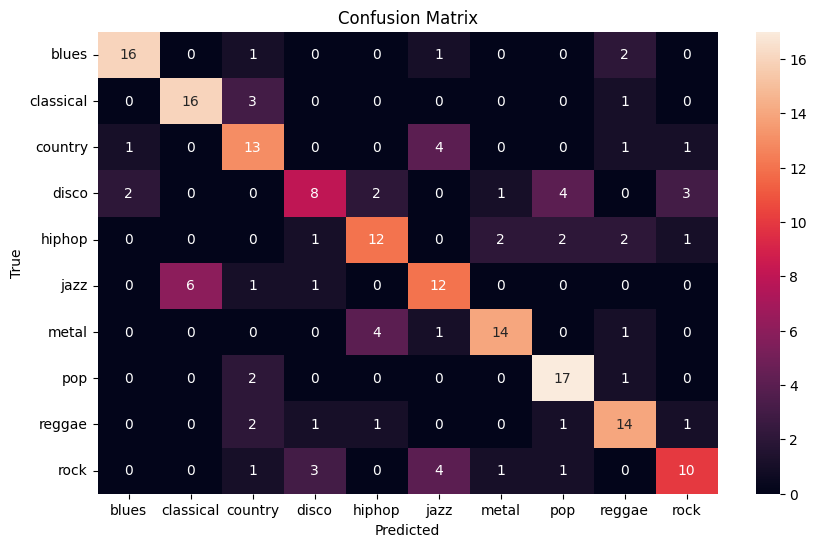

In [12]:
acc = accuracy_score(y_test, y_pred)
print(f" Accuracy: {acc*100:.2f}%")

print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [13]:
!pip install librosa tensorflow matplotlib seaborn


Original shape of first X element: (16, 660, 1)
After squeeze: (1000, 16, 660)
Detected 2D spectrograms — continuing normally.
Final X shape: (1000, 16, 660, 1)
Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.1916 - loss: 2.6397 - val_accuracy: 0.3200 - val_loss: 1.9123
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2448 - loss: 1.9689 - val_accuracy: 0.4300 - val_loss: 1.7421
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3359 - loss: 1.8258 - val_accuracy: 0.3750 - val_loss: 1.7392
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3833 - loss: 1.7847 - val_accuracy: 0.5450 - val_loss: 1.4520
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3993 - loss: 1.6978 - val_accuracy: 0.5300 - val_loss: 1.4635
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4412 - loss: 1.5963 - val_accuracy: 0.5400 - val_loss: 1.2884
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5002 - loss: 1.4664 - val_accuracy: 0.5200 - val_loss: 1.3360
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5327 - loss: 1.4102 - val_accuracy: 0.6250 - val_loss: 1.1352


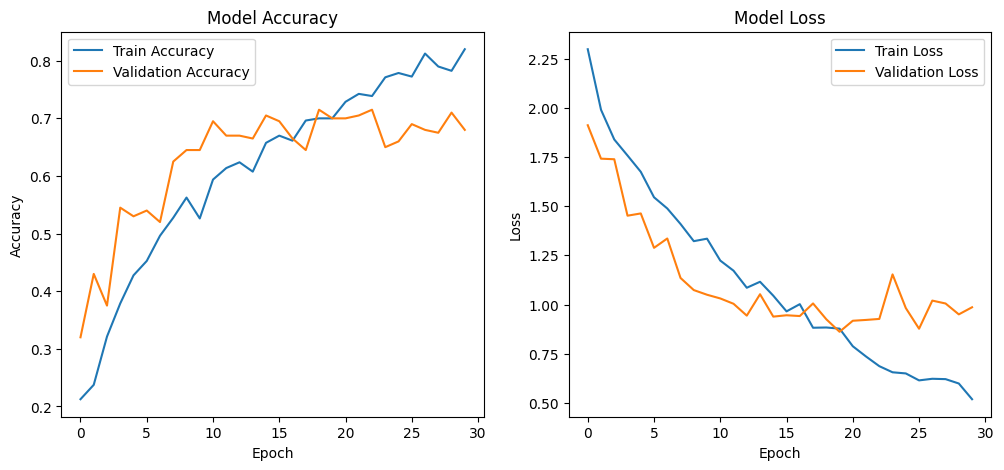

In [17]:
# 🎵 Music Genre Classification using CNN + Mel Spectrograms

import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

print("Original shape of first X element:", np.array(X[0]).shape)

# ✅ Convert X to array
X = np.array([np.squeeze(x) for x in X])
print("After squeeze:", X.shape)

# ✅ Check if 1D or 2D
if len(X[0].shape) == 1:
    print("Detected 1D features — reshaping for CNN compatibility...")
    # Example: 160 features → reshape into 2D "fake spectrogram" (16×10)
    X = np.array([x.reshape(16, 10) for x in X])
else:
    print("Detected 2D spectrograms — continuing normally.")

# ✅ Fix shape (pad/truncate)
fixed_length = 660
X_fixed = []

for mel in X:
    # Ensure it has two dimensions
    if mel.ndim == 1:
        mel = mel.reshape(-1, 1)
    if mel.shape[1] < fixed_length:
        pad_width = fixed_length - mel.shape[1]
        mel_padded = np.pad(mel, ((0, 0), (0, pad_width)), mode='constant')
    else:
        mel_padded = mel[:, :fixed_length]
    X_fixed.append(mel_padded)

X = np.array(X_fixed)
X = X[..., np.newaxis]  # final shape (samples, height, width, 1)
print("Final X shape:", X.shape)

# ✅ Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_encoded = tf.keras.utils.to_categorical(y_encoded)

# ✅ Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=X_train.shape[1:]),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(y_train.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=16,
    validation_data=(X_test, y_test)
)
# ✅ Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

# ✅ Plot results
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [18]:
model.save("music_genre_cnn_model.h5")
